**1. 가중치 $w_1, w_2$가 1인 퍼셉트론을 생각하자. 어떤 범위의 임계값 $\theta$에 대하여 이 퍼셉트론은 OR게이트를 표현하는가? 그리고, 어떤 범위의  임계값 $\theta$에 대하여 AND 게이트를 표현하는가?**

경계를 나타내는 직선은 $x_1 + x_2 = \theta$입니다.
기울기가 -1이고 
$$
{x_1 \over \theta} + {x_2 \over \theta} = 1
$$
으로 변형하면 두 절편이 모두 $\theta$임을 알수 있습니다.  
OR 게이트는 세점 (T,F), (T,T), (F,T)과 한점 (F,F)를 위 직선으로 분리해야 하겠지요.  
$0<\theta<1$은 명백하고 $\theta=0,1$은 직접 대입해서 확인해야 합니다.  
$0+0 \le 0$이고 $1+0 \le 1$이므로 OR 게이트를 나타내는 $\theta$의 범위는
$$
0 \le \theta < 1
$$
입니다.
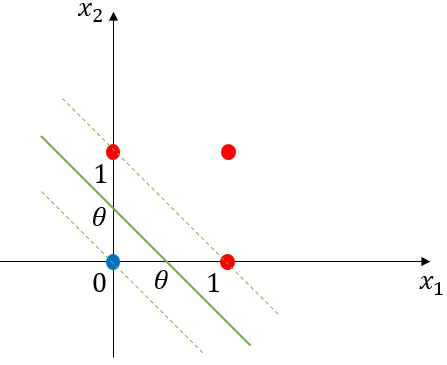

AND 게이트는 한점 (T,T)와 세점 (T,F), (F,T), (F,F)를 위 직선으로 분리해야 하겠지요.  
$1<\theta<2$은 명백하고 $\theta=1,2$는 직접 대입해서 확인해야 합니다.  
$1+0 \le 0$이고 $1+1 \le 2$이므로 AND 게이트를 나타내는 $\theta$의 범위는
$$
1 \le \theta < 2
$$
입니다.
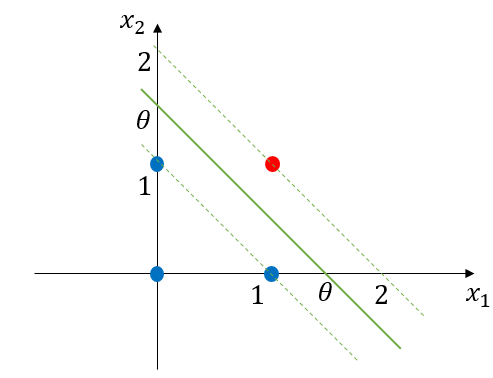

**2.(i) 다음은 NOR 게이트의 진리표이다. 적절한 가중치 $w_1$, $w_2$와 임계값 $\theta$를 잡아  단층 퍼셉트론을 이용하여 NOR 게이트를 구현하시오.
$$
\begin{array}{|c c|c|}
p & q & p \downarrow q\\
\hline
T & T & F\\
T & F & F\\
F & T & F\\
F & F & T\\
\end{array}
$$**

$w_1=0.5, w_2=0.5, \theta=0.2$로 잡으면 $(1,1), (1,0), (0,1)$은 부등식
$$
0.5 x_1 +0.5 x_2 > 0.2
$$
를 만족하고 $(0,0)$은 만족하지 않기 때문에 OR 게이트를 구현하는 퍼셉트론이 됩니다.  
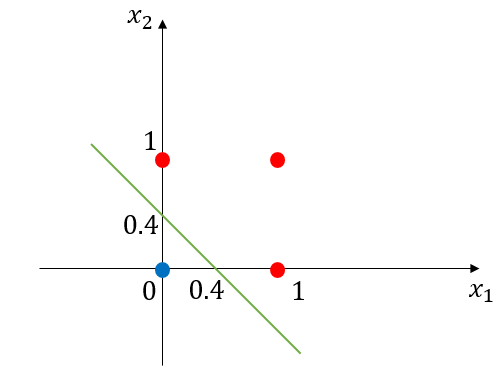
NOR 게이트는 NOT OR이기 때문에 빨간점과 파란점을 바꿔야 합니다.  
부등식의 영역을 바꿔주는 방법은
$$
0.5 x_1 + 0.5 x_2 < 0.2
$$
와 같이 부등호의 방향을 바꿔주면 됩니다.  
퍼셉트론은 임계값을 넘는 형태로 표현되야 하기 때문에 양변에 -1을 곱해서 동치식
$$
-0.5 x_1 - 0.5 x_2 > -0.2
$$
으로 표현해야 합니다.  
$w_1=-0.5, w_2=-0.5, \theta=-0.2$로 잡으면 NOR 게이트를 나타내는 단층 퍼셉트론이 됩니다.  
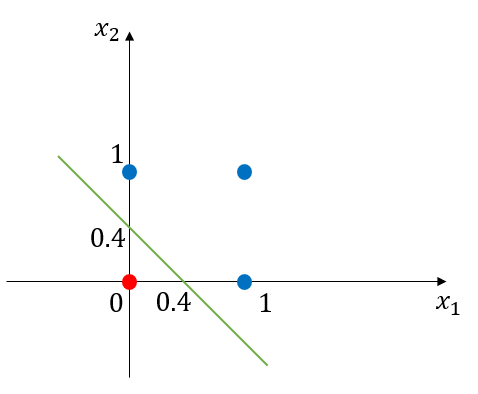

**(ii) OR_gate.py를 수정하여 (i)을 구현하시오.**

In [1]:
import numpy as np

def NOR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 0


**3.(i) 적절한 가중치 $w_1, w_2$와 임계값 $\theta$를 잡아  퍼셉트론을 이용하여 조건명제 $p \rightarrow q$를 구현하시오.**

$p \rightarrow q$의 진리표는
$$
\begin{matrix}
p & q & p \rightarrow q \\
T & T & T \\
T & F & F \\
F & T & T \\
F & F & T
\end{matrix}
$$
입니다.  
세점 (T,T), (F,T), (F,F)와 한점 (T,F)를 직선으로 분리해야합니다.  
분리하는 직선은 여러가지가 있겠지만 다음과 같이 분리해보죠.  
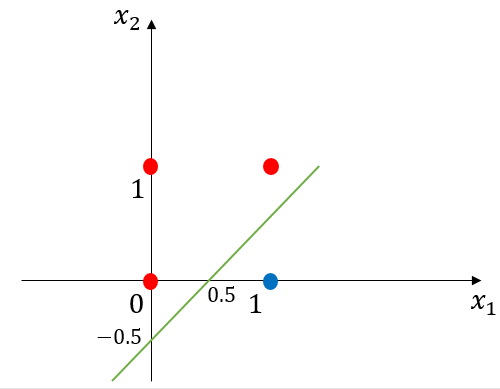
직선의 방정식은
$$
{x_1 \over 0.5} - {x_2 \over 0.5} = 1
$$
입니다.  
부등식 $2 x_1 - 2 x_2 > 1$에 만만한 점 $(0,0)$을 대입하면 만족을 안하네요.  
양변에 -1을 곱하면 동치인 부등식 $-2 x_1 + 2 x_2 < -1$은 여전히 같은 영역을 나타냅니다.  
부등호 방향을 바꾸면
$$
-2 x_1 + 2 x_2 > -1
$$
은 반대 영역을 나타냅니다.

**(ii) AND_gate.py를 수정하여 (i)을 구현하시오.**

In [2]:
import numpy as np

def IF(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-2, 2])
    b = 1
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = IF(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 0
(0, 1) -> 1
(1, 1) -> 1


**4.(i) 단층 퍼셉트론으로는 동치를 나타내는 조건 명제 $$(p \to q) \quad {\rm and} \quad (q \to p)$$를 표현할 수 없음을  기하학적으로 설명하시오.**

$p \leftrightarrow q$의 진리표는
$$
\begin{matrix}
p & q & p \leftrightarrow q \\
T & T & T \\
T & F & F \\
F & T & F \\
F & F & T
\end{matrix}
$$
입니다. XOR 게이트와 정반대네요.
두점 (T,T), (F,F)와 두점 (T,F), (F,T)를 직선으로 분리해야 하는데 불가능합니다.
XOR 게이트와 참 거짓만 뒤바뀌었을 뿐 본질적으로 이유가 같습니다.
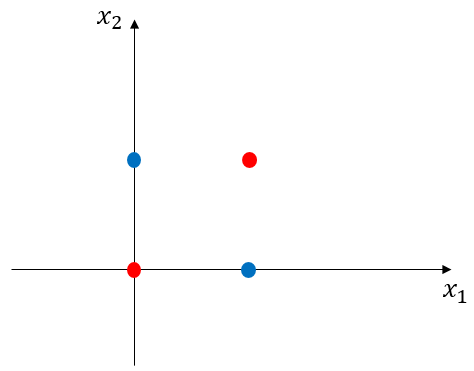

**(ii) 다층 퍼셉트론으로 위 동치를 나타내는 조건명제를  표현하시오.**

XOR 게이트를 이층 퍼셉트론으로 표현하면 다음과 같습니다.
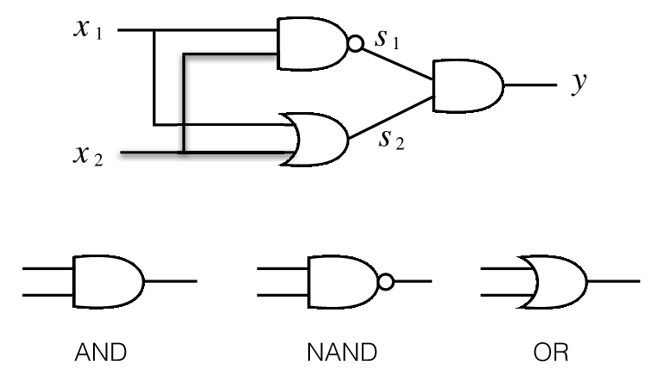

$p \leftrightarrow q$는 XOR 게이트를 부정해서 얻어지므로 마지막 AND 게이트를 NAND 게이트로 바꿔주면 됩니다.
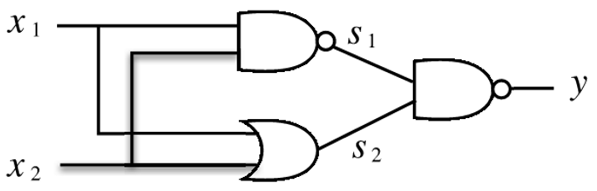

**(iii) XOR_gate.py를 수정하여 (ii)를 구현하시오.**

y = AND(s1, s2)를 y = NAND(s1, s2)로 바꿔줍니다.

In [3]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch\ch02') # 각자의 경로로 수정해주세요.

In [4]:
from and_gate import AND
from or_gate import OR
from nand_gate import NAND


def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = NAND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


**5. (i) 참을 거짓으로 거짓을 참으로 바꾸는 NOT 게이트를 생각하자. 적절한 가중치 $w$와 임계값 $\theta$를 잡아  퍼셉트론을 이용하여 NOT 게이트를 표현하시오. (입력이 하나이므로 가중치도 한개이다.)**

답은 여러가지가 가능한데 가급적 간단히 가중치 $w=-1$, 임계값 $\theta=-0.5$로 잡아 보죠.
T가 입력되면
$$
w x = -1 \times 1 \le -0.5 = \theta
$$
이므로 F가 출력됩니다.
F가 입력되면
$$
w x = -1 \times 0 > -0.5 = \theta
$$
이므로 T가 출력됩니다.
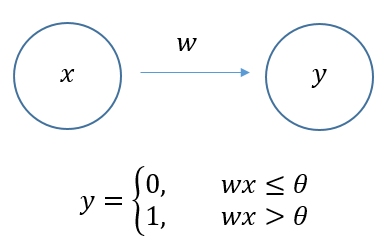

**(ii) 퍼셉트론을 이용한 NOT 게이트를 코드로 구현하시오.**

In [5]:
def NOT(x):
    w=-1
    theta=-0.5
    if w*x > theta:
        return 1
    else:
        return 0

if __name__ == '__main__':
    for x in [0,1]:
        y = NOT(x)
        print(str(x) + " -> " + str(y))

0 -> 1
1 -> 0


다음 이층 퍼셉트론을 생각하자.
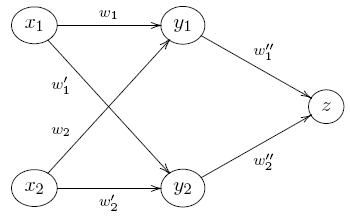

**6.(i) 적절한 가중치와 임계값 $(w_1,w_2,\theta)$, $(w_1',w_2',\theta')$,  $(w_1'',w_2'',\theta'')$을 선택하여 퍼셉트론이 XOR 게이트를 표현하도록 하시오.**

$(w_1,w_2,\theta)$는 NAND, $(w_1',w_2',\theta')$는 OR,  $(w_1'',w_2'',\theta'')$는 AND를 표현하도록
$$
(w_1,w_2,\theta) = (-0.5,-0.5,-0.7),\quad (w_1',w_2',\theta') = (0.5,0.5,0.2),\quad (w_1'',w_2'',\theta'')=(0.5,0.5,0.7)
$$
와 같이 잡습니다.

**(ii) 다른 게이트의 코드를 사용하지 않고 XOR 게이트를 직접 구현하시오.**

In [6]:
def XOR(x1, x2):
    if -0.5*x1-0.5*x2 > -0.7:
        y1 = 1
    else:
        y1 = 0
    if  0.5*x1+0.5*x2 > 0.2:
        y2 = 1
    else:
        y2 = 0
    if 0.5*y1+0.5*y2 > 0.7:
        z = 1
    else:
        z = 0
    return z
    

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


**7.(i) 가중치와 임계값 $(w_1,w_2,\theta)$, $(w_1',w_2',\theta')$,  $(w_1'',w_2'',\theta'')$을 적절히 선택하여 참이 되는 $(x_1,x_2)$가 다음 파란색 영역이 되도록 하시오.**
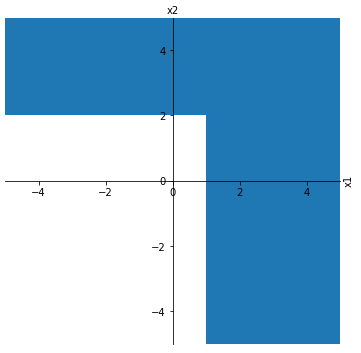

파란색 영역은 $x_1>1$이 나타내는 영역과 $x_2>2$이 나타내는 영역의 합집합입니다.  
$(w_1,w_2,\theta)=(1,0,1)$로 잡으면 $x_1>1$이 되고 $(w_1',w_2',\theta')=(0,1,2)$로 잡으면 $x_2>2$이 됩니다.  
OR는 진리집합의 합집합에 대응하죠.  
따라서, $(w_1'',w_2'',\theta')=(0.5,0.5,0.2)$로 잡으면 됩니다.

**(ii) 코드로 구현하시오.**

In [7]:
def Perceptron(x1, x2):
    if 1*x1+0*x2 > 1:
        y1 = 1
    else:
        y1 = 0
    if  0*x1+1*x2 > 2:
        y2 = 1
    else:
        y2 = 0
    if 0.5*y1+0.5*y2 > 0.2:
        z = 1
    else:
        z = 0
    return z

**(iii) 다음 영역에 대하여 같은 작업을 하시오.**
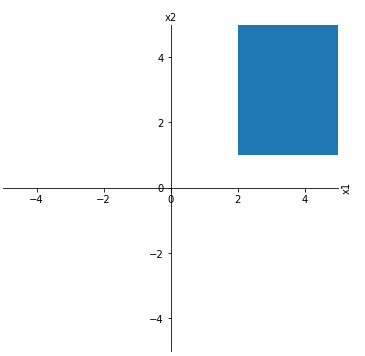

파란색 영역은 $x_1>2$이 나타내는 영역과 $x_2>1$이 나타내는 영역의 교집합입니다.  
$(w_1,w_2,\theta)=(1,0,2)$로 잡으면 $x_1>2$이 되고 $(w_1',w_2',\theta')=(0,1,1)$로 잡으면 $x_2>1$이 됩니다.  
AND는 진리집합의 교집합에 대응하죠.  
따라서, $(w_1'',w_2'',\theta')=(0.5,0.5,0.7)$로 잡으면 됩니다.

In [8]:
def Perceptron(x1, x2):
    if 1*x1+0*x2 > 2:
        y1 = 1
    else:
        y1 = 0
    if  0*x1+1*x2 > 1:
        y2 = 1
    else:
        y2 = 0
    if 0.5*y1+0.5*y2 > 0.7:
        z = 1
    else:
        z = 0
    return z

**8. 다음은 2층 퍼셉트론으로 XOR 게이트를 구현하는 방법이다. 이를 기하학적으로 설명하려 한다.**  
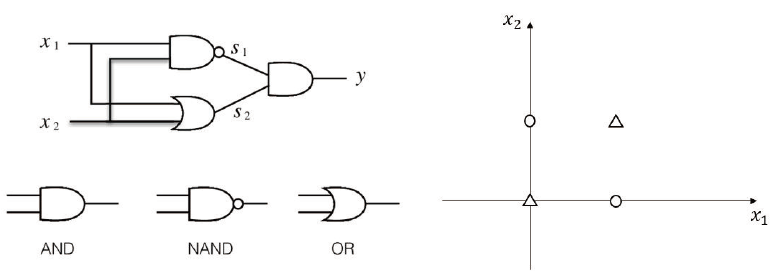

**(i) 적절한 가중치 $w_1$, $w_2$와 임계값 $\theta$를 잡아  NAND 게이트를 구현하고 오른쪽 좌표평면에 영역을 그리시오.**

$w_1=-0.5, w_2=-0.5, \theta=-0.7$  
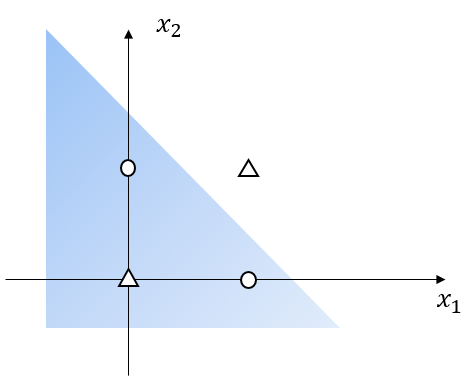

**(ii) 적절한 가중치 $w_1$, $w_2$와 임계값 $\theta$를 잡아  OR 게이트를 구현하고 오른쪽 좌표평면에 영역을 그리시오.**

$w_1=0.5, w_2=0.5, \theta=0.2$  
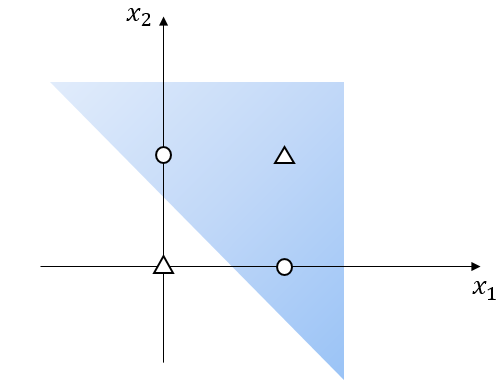

**(iii) 두 영역에 AND 게이트를 적용한 후 오른쪽 좌표평면에 그리시오. 위 2층 퍼셉트론이 XOR 게이트를 구현함을 기하학적으로 설명하시오.**

AND는 진리집합의 교집합에 대응합니다.  
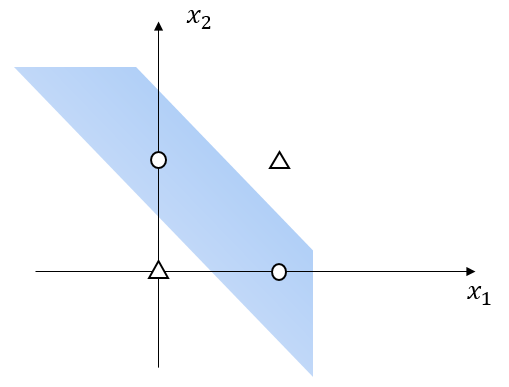
(T,F), (F,T)는 영역안에 들어가고 (T,T), (F,F)는 영역안에 들어가지 않습니다.  
따라서 XOR 게이트를 구현합니다.